# License statistics
In this notebook we demonstrate how to retrieve our link collection as pandas DataFrame and how to plot some statistics from it, e.g. showing which licenses are used by who.

In [1]:
import sys
sys.path.append("../scripts/")
import pandas as pd
from generate_link_lists import load_dataframe
import matplotlib.pyplot as plt

## Data import and cleaning

In [2]:
df = load_dataframe("../resources/")

In [3]:
df.head(4)

,authors,name,tags,type,url,license,event_date,event_location,description,num_downloads,publication_date,fingerprint,author,submission_date
0,[Elisabeth Kugler],Sharing Your Poster on Figshare: A Community G...,"[Sharing, Research Data Management]",[Blog],https://focalplane.biologists.com/2023/07/26/s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[Marcelo Zoccoler],Running Deep-Learning Scripts in the BiA-PoL O...,"[Python, Artificial Intelligence, Bioimage Ana...",[Blog],https://biapol.github.io/blog/marcelo_zoccoler...,CC-BY-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[Robert Haase],Browsing the Open Microscopy Image Data Resour...,"[OMERO, Python]",[Blog],https://biapol.github.io/blog/robert_haase/bro...,CC-BY-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[Mara Lampert],Getting started with Mambaforge and Python,"[Python, Conda, Mamba]",[Blog],https://biapol.github.io/blog/mara_lampert/get...,CC-BY-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# turn lists in colums to strings
df = df.astype(str)

# replace NaNs with ""
df = df.fillna("")

for column in df.columns:
    df[column] = df[column].str.lower()

## Filtering licenses by Author

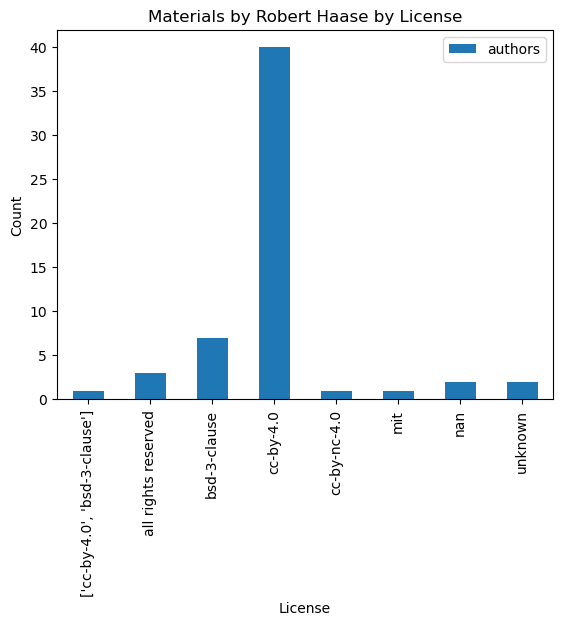

In [5]:
# Find materials from specific author
filtered_df = df[df['authors'].str.contains('Robert Haase', case=False)][['license', 'authors']]

# Group by license and count entries
grouped_df = filtered_df.groupby('license')
license_counts = grouped_df.count()

# Draw bar plot
license_counts.plot(kind='bar')
plt.xlabel('License')
plt.ylabel('Count')
plt.title('Materials by Robert Haase by License')
plt.show()

## Filtering licenses by tag

In [6]:
import matplotlib.pyplot as plt

# Step 1
df['artificial_intelligence'] = df['tags'].str.contains('artificial intelligence', case=False)
df['bioimage_analysis'] = df['tags'].str.contains('bioimage analysis', case=False)
df['research_data_management'] = df['tags'].str.contains('research data management', case=False)

# Step 2
filtered_df = df[(df['artificial_intelligence'] == True) | (df['bioimage_analysis'] == True) | (df['research_data_management'] == True)]

filtered_df = filtered_df[['license', 'artificial_intelligence', 'bioimage_analysis', 'research_data_management']]
filtered_df.head(5)

,license,artificial_intelligence,bioimage_analysis,research_data_management
0,nan,False,False,True
1,cc-by-4.0,True,True,False
4,nan,False,False,True
5,nan,False,False,True
6,nan,False,True,False


In [7]:
# group by license and count
grouped_df = filtered_df.groupby('license')
license_counts = grouped_df.sum()

# select counts > 1
selected_license_counts = license_counts[(license_counts['artificial_intelligence'] > 1) |
(license_counts['bioimage_analysis'] > 1) |
(license_counts['research_data_management'] > 1) ]
selected_license_counts

,artificial_intelligence,bioimage_analysis,research_data_management
license,,,
all rights reserved,0,7,2
bsd-3-clause,0,16,0
cc-by-4.0,5,48,73
cc-by-nc-4.0,0,2,0
cc-by-sa-4.0,0,1,2
cc0-1.0,0,5,2
gpl-3.0,0,4,0
mit,2,8,1
nan,0,24,12


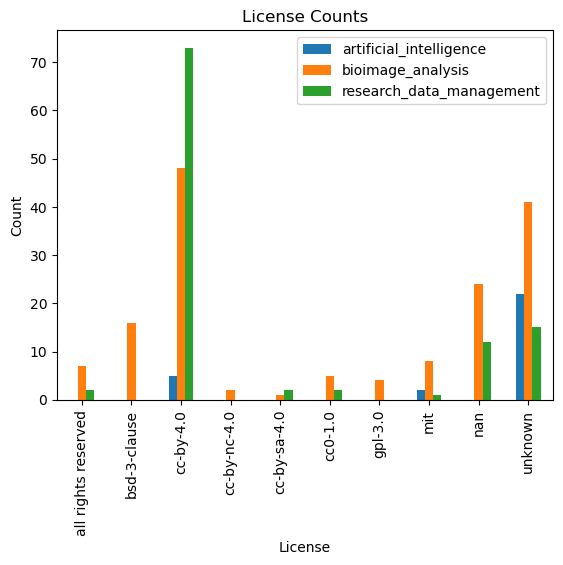

In [8]:
# plot
selected_license_counts.plot(kind='bar')
plt.xlabel('License')
plt.ylabel('Count')
plt.title('License Counts')
plt.show()

## Filtering licenses by community

In [9]:
df['neubias'] = df['tags'].str.contains('neubias', case=False)
df['nfdi4bioimage'] = df['tags'].str.contains('nfdi4bioimage', case=False)
df['omero'] = df['tags'].str.contains('omero', case=False)


# Step 2
filtered_df = df[(df['neubias'] == True) | (df['nfdi4bioimage'] == True) | (df['omero'] == True)]

filtered_df = filtered_df[['license',  'tags', 'neubias', 'nfdi4bioimage', 'omero']]
filtered_df.head(5)

,license,tags,neubias,nfdi4bioimage,omero
2,cc-by-4.0,"['omero', 'python']",False,False,True
12,nan,"['metadata', 'workflow', 'omero']",False,False,True
17,nan,"['omero', 'research data management']",False,False,True
26,nan,"['bioimage analysis', 'omero', 'research data ...",False,False,True
33,cc-by-4.0,['omero'],False,False,True


In [10]:
# group by license and count
grouped_df = filtered_df.groupby('license')
license_counts = grouped_df.sum()

# select counts > 1
selected_license_counts = license_counts[(license_counts['neubias'] > 1) |
(license_counts['nfdi4bioimage'] > 1) |
(license_counts['omero'] > 1) ]
selected_license_counts

,tags,neubias,nfdi4bioimage,omero
license,,,,
bsd-2-clause,['omero']['omero']['omero']['omero']['neubias'...,1,0,5
bsd-3-clause,"['neubias', 'imagej', 'bioimage analysis']['ne...",6,0,0
cc-by-4.0,"['omero', 'python']['omero']['neubias', 'bioim...",4,20,9
gpl-2.0,"['omero', 'github', 'fiji']['omero', 'imagej',...",0,0,3
nan,"['metadata', 'workflow', 'omero']['omero', 're...",1,0,4
unknown,"['omero']['neubias', 'bioimage analysis']['neu...",13,2,4


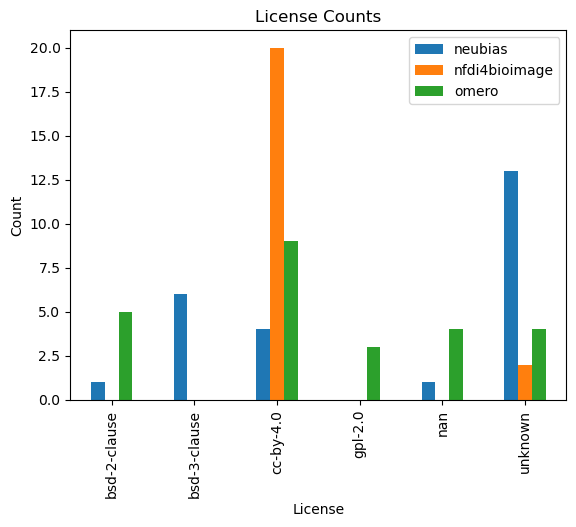

In [11]:
# plot
selected_license_counts.plot(kind='bar')
plt.xlabel('License')
plt.ylabel('Count')
plt.title('License Counts')
plt.show()